In [964]:
#T. Bradford 
#October 2021

#dependents 
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [965]:
# Loading the preprocessed iris dataset
file_path = Path("crypto_data.csv")
crypto = pd.read_csv(file_path)
crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [966]:
#dataframe of only IsTrading equals True
trading_crypto = crypto[(crypto['IsTrading'])]
trading_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [967]:
#removed IsTrading column
active_crypto = trading_crypto.drop('IsTrading', axis=1)
active_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [968]:
## Identify incomplete rows
active_crypto.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [969]:
## Drop all rows with missing information
active_crypto = active_crypto.dropna(how='any')
active_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [970]:
##dataframe futher filtered to show TotalCoinsMined greater than 0 and renamed unnamed column
new_trading_crypto = active_crypto[(active_crypto['TotalCoinsMined']) > 0]
new_trading_crypto.rename(columns={"Unnamed: 0": "Symbol"})


,Symbol,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [971]:
#removed CoinName column
prep_crypto = new_trading_crypto.drop('CoinName', axis=1)
prep_crypto

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [972]:
# Convert categorical data to numeric and separate target feature for training data

#drop categorical data and separate target
y_train_df = prep_crypto["Unnamed: 0"]
y_label_train = LabelEncoder().fit_transform(prep_crypto['Unnamed: 0'])

# One-hot encoding train data 
X1 = prep_crypto.drop('Unnamed: 0', axis=1)
prep_crypto_dummie_df = pd.get_dummies(X1)

prep_crypto_dummie_df

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## The number of rows remained the same bout the number of columns increased from 6 to 377

In [973]:
# Standarize data with StandarScaler
prep_crypto_dummie_df_scaled = StandardScaler().fit_transform(prep_crypto_dummie_df)
print(prep_crypto_dummie_df_scaled[0:5])

[[-0.11710817 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11671506 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11474682 -0.0433963  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [974]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.90, random_state=100)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(prep_crypto_dummie_df_scaled)

# pca.fit(data_rescaled)
# reduced = pca.transform(data_rescaled)

crypto_pca

array([[-2.67092248e-01, -1.16293969e-01, -2.75732806e-15, ...,
         1.25152058e+00,  6.82882208e-01, -1.50947062e+00],
       [-2.49924699e-01, -1.17272732e-01, -3.25016718e-15, ...,
        -6.73010177e-01, -1.97316071e+00,  1.70225075e+00],
       [ 3.14746498e-01, -2.86187718e-03,  2.44713680e-16, ...,
         1.13837114e+00,  1.67653502e+00, -2.71559881e+00],
       ...,
       [-6.67192566e-02, -3.11211774e-01,  8.30680353e-15, ...,
        -1.78166772e+00,  2.21936994e+00,  1.40860170e+00],
       [-2.90507995e-01, -2.45950491e-01,  7.75326907e-15, ...,
        -8.10997761e-16,  9.21133259e-16, -1.49183539e-15],
       [-1.99343294e-01, -6.23600551e-02, -8.15094422e-16, ...,
        -4.72551374e-13,  4.78561268e-13, -1.48710144e-12]])

In [975]:
# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,-2.757328e-15,2.186894e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,3.171457e-01,-8.361316e-01,2.502189e-01,-7.177191e-01,1.519058e+00,-9.226036e-01,7.548178e-01,1.251521e+00,6.828822e-01,-1.509471e+00
1,-0.249925,-0.117273,-3.250167e-15,1.058796e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,1.181194e+00,3.964897e-01,2.636099e+00,-9.936792e-01,-6.661969e-01,-4.202546e-01,-8.495283e-01,-6.730102e-01,-1.973161e+00,1.702251e+00
2,0.314746,-0.002862,2.447137e-16,2.009568e-15,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,-6.648966e-01,2.576352e+00,-1.033072e+00,9.565872e-02,1.041433e+00,6.092059e-01,-4.858294e-02,1.138371e+00,1.676535e+00,-2.715599e+00
3,-0.250886,-0.222136,5.905327e-15,1.477623e-17,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,-2.251520e-15,-3.961123e-16,-1.058803e-15,1.335393e-15,1.001232e-16,2.019359e-15,4.078768e-15,9.136240e-16,-2.490564e-16,1.838512e-15
4,-0.119293,-0.222472,2.250542e-15,1.656100e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,7.947277e-16,2.282809e-15,1.551909e-15,4.205174e-16,2.503080e-16,-5.534739e-16,-2.941118e-16,-1.727125e-15,1.193969e-15,1.802217e-16


In [976]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.00839215, 0.00799006, 0.00797255, 0.00797255, 0.00794421,
       0.00741891, 0.00696609, 0.00687449, 0.00656659, 0.0061131 ,
       0.00588744, 0.00575784, 0.00569   , 0.00555906, 0.00549437,
       0.00532247, 0.00532026, 0.00531503, 0.00531503, 0.00531503,
       0.00531503, 0.00531503, 0.00531503, 0.00531488, 0.00531089,
       0.00527432, 0.00523105, 0.00521782, 0.00508932, 0.00501107,
       0.00498244, 0.00496689, 0.0049616 , 0.00491607, 0.00487546,
       0.00485005, 0.00483744, 0.00482475, 0.00478222, 0.00475574,
       0.00466862, 0.00465538, 0.00462004, 0.00460902, 0.0045821 ,
       0.0045637 , 0.00456113, 0.00454578, 0.00454094, 0.00453147,
       0.00448855, 0.00447791, 0.00446873, 0.00440764, 0.00439661,
       0.00427716, 0.00424332, 0.00418783, 0.00405474, 0.00401174,
       0.00393489, 0.00380768, 0.00379098, 0.00377029, 0.00374979,
       0.00364987, 0.00358469, 0.00355848, 0.00349388, 0.00344452,
       0.00340763, 0.00316666, 0.00298865, 0.00276281, 0.00270

## Perserving 90% explained variance in dimensional reduction decreased from 377 to 274

In [977]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(crypto_pca)

In [978]:
crypto_pca_df['x'] = transformed_features[:,0]
crypto_pca_df['y'] = transformed_features[:,1]
#prep_crypto['class'] = prep_crypto['Unnamed: 0']

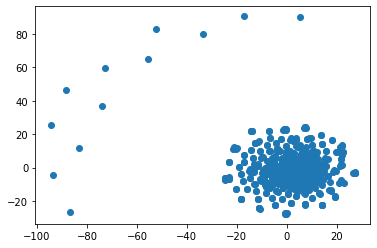

In [979]:
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

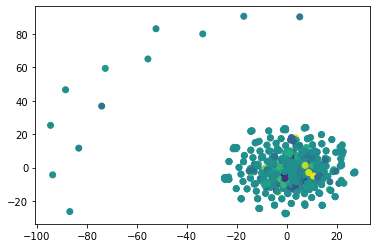

In [980]:
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'], c=crypto_pca_df[273])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


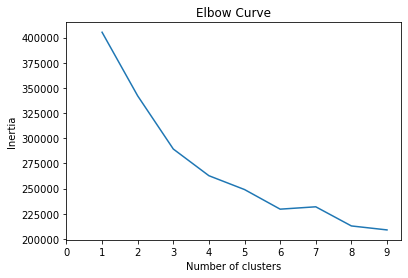

In [981]:
# Finding the best value for k
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=500)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(10)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [982]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(crypto_pca_df)

# Predict clusters
predictions = model.predict(crypto_pca_df)

# Add the predicted class column to the dataframe
crypto_pca_df["class"] = model.labels_
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,267,268,269,270,271,272,273,x,y,class
0,-0.267092,-0.116294,-2.757328e-15,2.186894e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,-7.177191e-01,1.519058e+00,-9.226036e-01,7.548178e-01,1.251521e+00,6.828822e-01,-1.509471e+00,2.722584,-13.085048,0
1,-0.249925,-0.117273,-3.250167e-15,1.058796e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,-9.936792e-01,-6.661969e-01,-4.202546e-01,-8.495283e-01,-6.730102e-01,-1.973161e+00,1.702251e+00,5.865546,-8.194712,0
2,0.314746,-0.002862,2.447137e-16,2.009568e-15,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,9.565872e-02,1.041433e+00,6.092059e-01,-4.858294e-02,1.138371e+00,1.676535e+00,-2.715599e+00,-8.687406,-3.843534,3
3,-0.250886,-0.222136,5.905327e-15,1.477623e-17,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,1.335393e-15,1.001232e-16,2.019359e-15,4.078768e-15,9.136240e-16,-2.490564e-16,1.838512e-15,7.135621,2.919503,2
4,-0.119293,-0.222472,2.250542e-15,1.656100e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,4.205174e-16,2.503080e-16,-5.534739e-16,-2.941118e-16,-1.727125e-15,1.193969e-15,1.802217e-16,2.609165,16.860958,2


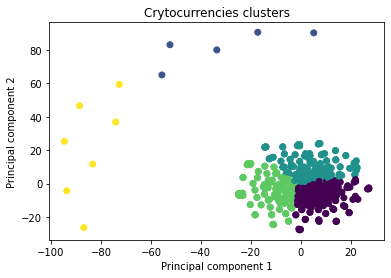

In [983]:
# Visualize the clusters
plt.scatter(x=crypto_pca_df['x'], y=crypto_pca_df['y'], c=crypto_pca_df['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crytocurrencies clusters')
plt.show()

## Based off my finding cryptocurrencies can be clustered together. My analysis show that there are 5 clusters 3 of which was are simular enough to possibly be one.